# Imbalanced Dataset

- This is a classification problem where there s an unequal distribution of classes in the dataset

- It it poses a challenge to the classificatio model as most of the model learns on the assumption of an equal number of samples for each class.

- training in an imbalanced dataset produces a poor predictive performance specially for the minority classes.

## Types of classification
- Binary Classification
    - only two class
- Multiclass Classification
    - has more than two classes

## Describing an imbalance dataset
- ratio (i.e. 1:100)
- percentage (i.e. 80% class 1, 20% class 2)

## Domains where there is severe imbalance in class distribution
- Fraud Detection
- Claim Prediction
- Default Prediction
- Churn Prediction
- Spam Prediction
- Anomaly Detection
- Outlier Detection
- Intrusion Detection
- Conversion Prediction


### Data
https://www.kaggle.com/andrewmvd/fetal-health-classification

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:
- Normal = 1
- Suspect = 2
- Pathological = 3

### Class Imbalance
This data is imbalanced, where 'normal' class far outnumbers the other two classes

## Base Imports and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import raw data
raw_data = pd.read_csv("fetal_health.csv")
raw_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [3]:
# check if there are null values to clean
raw_data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [4]:
# split into input and output
x = raw_data[raw_data.columns.to_list()[:-1]]
y = raw_data['fetal_health']
x

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [5]:
from sklearn.preprocessing import LabelEncoder

# label encode the target variable
y = LabelEncoder().fit_transform(y)
y

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [6]:
from collections import Counter

def get_distribution(y):
    # summarize distribution
    counter = Counter(y)
    distribution = []
    for k, v in counter.items():
        per = v / len(y) * 100
        print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

    # plot the distribution
    plt.bar(counter.keys(), counter.values())
    plt.show()

Class=1, n=295 (13.876%)
Class=0, n=1655 (77.846%)
Class=2, n=176 (8.278%)


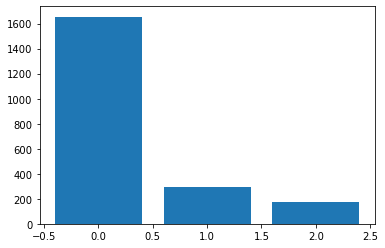

In [7]:
get_distribution(y)

### Analysis of Data
- Above shows that Class '0' or 'Normal' dominates the classes by 77.846%
- Class '1' and '2', 'Suspected' and 'Pathological', has a 13.876% and 8.278% sample population, respectively.
- This shows a severe imbalance in the dataset
- This is a Multiclass Imbalanced dataset

# Oversampling and Undersampling for Imbalanced Dataset
- a method to balance our Dataset by randomly resampling the Dataset
- naive resampling
    - assumes nothing about the data
## Two types
- Undersampling
    - delete samples from majority class
    - results in losing information
- Oversampling
    - duplicate samples from minority class
    - can result to overfitting

In [8]:
# pip install imbalanced-learn
# import imblearn 
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

## Oversampling

### RandomOverSampler
##### sampling_strategy
- 'minority': resample only the minority class;
- 'not minority': resample all classes but the minority class;
- 'not majority': resample all classes but the majority class;
- 'all': resample all classes;
- 'auto': equivalent to 'not majority'.
- float value : percentage of number of sample of majority class, Can only be used for binary classes

Class=1, n=1655 (33.333%)
Class=0, n=1655 (33.333%)
Class=2, n=1655 (33.333%)


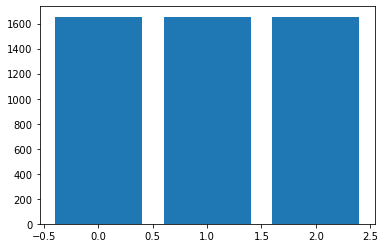

In [9]:
# define oversampling strategy
ros_oversample = RandomOverSampler(sampling_strategy='auto')
ros_x, ros_y = ros_oversample.fit_resample(x, y)
get_distribution(ros_y)

In [10]:
ros_x

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,110.0,0.004,0.002,0.005,0.008,0.0,0.001,67.0,3.3,0.0,...,130.0,63.0,193.0,5.0,0.0,88.0,85.0,97.0,59.0,-1.0
4961,130.0,0.002,0.002,0.008,0.008,0.0,0.002,64.0,2.5,0.0,...,161.0,50.0,211.0,7.0,0.0,60.0,83.0,114.0,241.0,-1.0
4962,110.0,0.002,0.003,0.002,0.009,0.0,0.002,68.0,3.2,0.0,...,124.0,63.0,187.0,6.0,1.0,91.0,78.0,94.0,39.0,-1.0
4963,132.0,0.000,0.000,0.008,0.002,0.0,0.002,30.0,1.7,0.0,...,90.0,60.0,150.0,3.0,0.0,99.0,104.0,102.0,33.0,0.0


In [11]:
# pipeline
# assemble several steps that can be cross-validated 
steps = [('over', RandomOverSampler(sampling_strategy='auto')), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, ros_x, ros_y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.984


## Undersampling

### RandomUnderSampler
##### sampling_strategy
- 'majority': resample only the majority class;
- 'not minority': resample all classes but the minority class;
- 'not majority': resample all classes but the majority class;
- 'all': resample all classes;
- 'auto': equivalent to 'not minority'.
- float value : percentage of number of sample of majority class, Can only be used for binary classes

Class=0, n=176 (33.333%)
Class=1, n=176 (33.333%)
Class=2, n=176 (33.333%)


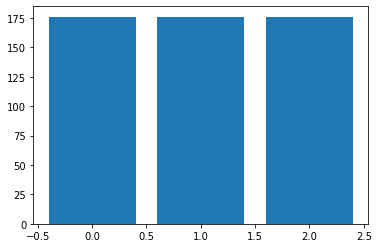

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,135.0,0.001,0.000,0.003,0.000,0.0,0.000,65.0,0.6,0.0,...,38.0,119.0,157.0,4.0,0.0,147.0,141.0,143.0,6.0,0.0
1,137.0,0.003,0.002,0.000,0.000,0.0,0.000,59.0,0.8,24.0,...,97.0,70.0,167.0,8.0,0.0,143.0,144.0,145.0,5.0,1.0
2,131.0,0.008,0.000,0.008,0.000,0.0,0.000,24.0,1.3,0.0,...,42.0,117.0,159.0,2.0,0.0,136.0,138.0,139.0,5.0,0.0
3,121.0,0.006,0.000,0.009,0.000,0.0,0.000,39.0,0.9,0.0,...,58.0,95.0,153.0,4.0,0.0,150.0,131.0,132.0,47.0,0.0
4,125.0,0.002,0.014,0.006,0.008,0.0,0.000,18.0,2.7,0.0,...,125.0,53.0,178.0,10.0,0.0,131.0,115.0,121.0,72.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,128.0,0.000,0.002,0.007,0.005,0.0,0.002,65.0,2.6,0.0,...,129.0,63.0,192.0,6.0,0.0,103.0,92.0,114.0,28.0,0.0
524,128.0,0.000,0.002,0.007,0.005,0.0,0.002,66.0,2.7,0.0,...,129.0,63.0,192.0,4.0,0.0,105.0,89.0,112.0,21.0,0.0
525,128.0,0.000,0.002,0.007,0.006,0.0,0.002,65.0,2.5,0.0,...,129.0,63.0,192.0,6.0,0.0,104.0,94.0,115.0,28.0,0.0
526,128.0,0.000,0.003,0.007,0.006,0.0,0.002,65.0,2.5,0.0,...,129.0,63.0,192.0,5.0,0.0,114.0,97.0,116.0,25.0,0.0


In [12]:
# define oversampling strategy
rus_undersample = RandomUnderSampler(sampling_strategy='auto')
rus_x, rus_y = rus_undersample.fit_resample(x, y)
get_distribution(rus_y)
rus_x

In [13]:
# define pipeline
steps = [('under', RandomUnderSampler(sampling_strategy='auto')), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, rus_x, rus_y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.850


# Multiclass Imbalanced Dataset
## Synthetic Minority Oversampling Technique (SMOTE)
- it will oversample all the classes to have the same number of samples as the class with the most samples
- here class '0' has the most examples of 1655. 
- SMOTE will oversample all other class to have the same amount
- It should <b>only</b> be applied to <b>training dataset</b>

In [14]:
from imblearn.over_sampling import SMOTE 

# call smote
smt_oversample = SMOTE()

# transform the dataset
smt_x, smt_y = smt_oversample.fit_resample(x,y)
smt_x


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,73.000000,0.500000,43.000000,...,64.000000,62.000000,126.000000,2.000000,0.000000,120.000000,137.000000,121.000000,73.000000,1.000000
1,132.000000,0.006000,0.000000,0.006000,0.003000,0.0,0.000000,17.000000,2.100000,0.000000,...,130.000000,68.000000,198.000000,6.000000,1.000000,141.000000,136.000000,140.000000,12.000000,0.000000
2,133.000000,0.003000,0.000000,0.008000,0.003000,0.0,0.000000,16.000000,2.100000,0.000000,...,130.000000,68.000000,198.000000,5.000000,1.000000,141.000000,135.000000,138.000000,13.000000,0.000000
3,134.000000,0.003000,0.000000,0.008000,0.003000,0.0,0.000000,16.000000,2.400000,0.000000,...,117.000000,53.000000,170.000000,11.000000,0.000000,137.000000,134.000000,137.000000,13.000000,1.000000
4,132.000000,0.007000,0.000000,0.008000,0.000000,0.0,0.000000,16.000000,2.400000,0.000000,...,117.000000,53.000000,170.000000,9.000000,0.000000,137.000000,136.000000,138.000000,11.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,134.706740,0.000569,0.000431,0.003724,0.003707,0.0,0.002000,39.519119,2.472435,0.000000,...,111.258047,54.879780,166.137827,5.568913,1.137827,122.982394,108.533701,117.689134,55.275653,0.000000
4961,148.767682,0.000000,0.001848,0.003465,0.000000,0.0,0.000000,78.535365,0.461616,8.989935,...,36.606094,136.161588,172.767682,1.383841,0.000000,150.767682,150.000000,151.000000,1.000000,-0.616159
4962,150.335728,0.000000,0.002080,0.002000,0.000000,0.0,0.000000,65.576748,0.358393,74.000000,...,30.598300,128.408884,159.007184,2.335728,0.000000,155.839320,153.839320,155.839320,0.583932,1.000000
4963,133.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,74.708469,0.200000,90.562704,...,7.145765,131.000000,138.145765,1.000000,0.000000,133.000000,134.000000,135.000000,0.000000,0.000000


In [15]:
smt_y

array([1, 0, 0, ..., 2, 2, 2], dtype=int64)

Class=1, n=1655 (33.333%)
Class=0, n=1655 (33.333%)
Class=2, n=1655 (33.333%)


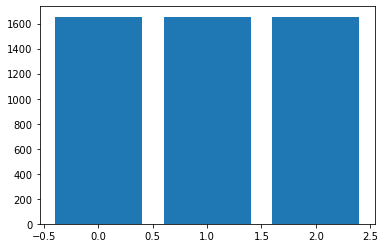

In [16]:
get_distribution(smt_y)

### SMOTE Customization
- we could specify th enumber of samples to oversample in each class using dictionaries
- With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples.

In [17]:
# transform dataset
strategy = {0:2000, 1:1755, 2:1655}
csmt_oversample = SMOTE(sampling_strategy=strategy)
csmt_x, csmt_y = csmt_oversample.fit_resample(x,y)


C:\Users\ijhre\anaconda3\envs\nlp_tf2\lib\site-packages\imblearn\utils\_validation.py:300: UserWarning: After over-sampling, the number of samples (2000) in class 0 will be larger than the number of samples in the majority class (class #0 -> 1655)
  f"After over-sampling, the number of samples ({n_samples})"
C:\Users\ijhre\anaconda3\envs\nlp_tf2\lib\site-packages\imblearn\utils\_validation.py:300: UserWarning: After over-sampling, the number of samples (1755) in class 1 will be larger than the number of samples in the majority class (class #0 -> 1655)
  f"After over-sampling, the number of samples ({n_samples})"


Class=1, n=1755 (32.440%)
Class=0, n=2000 (36.969%)
Class=2, n=1655 (30.591%)


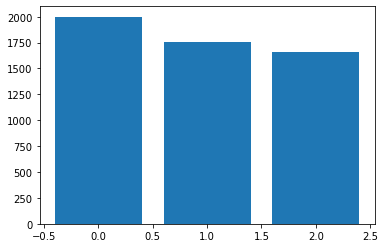

In [18]:
get_distribution(csmt_y)

## Cost-Sensitive Learning
- technique that change the way learning is performed to bias towards class that have fewer samples in training dataset

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [20]:
def evaluate_model(x, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    acc_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    f1_scores = cross_val_score(model, x, y, scoring='f1_micro', cv=cv, n_jobs=-1)
    return acc_scores, f1_scores


### Random Forest Classifier
- it assigns equal weight to each Class
- n_estimators, is the number of trees to make before taking the average of prediction. higher value = better performance but cpu intensive

In [21]:
def get_rfc_score(x,y, model):
    rfc_acc_mean = []
    rfc_acc_std = []
    rfc_f1_mean = []
    rfc_f1_std = []
    for i in range(5): # 5  iterations then get the average
        print(f"iteration {i+1} / 5")
        acc_scores, f1_scores = evaluate_model(x, y, model)
        # print(f"[{i+1}] Mean Accuracy: {np.mean(acc_scores):.3f} {np.std(acc_scores):.3f}")
        # print(f"[{i+1}] Mean F1 Score: {np.mean(f1_scores):.3f} {np.std(f1_scores):.3f}")
        rfc_acc_mean.append(np.mean(acc_scores))
        rfc_acc_std.append(np.std(acc_scores))

        rfc_f1_mean.append(np.mean(f1_scores))
        rfc_f1_std.append(np.std(f1_scores))

    rfc_acc_score = (np.mean(rfc_acc_mean), np.std(rfc_acc_std))
    rfc_f1_score = (np.mean(rfc_f1_mean), np.std(rfc_f1_std))
    return rfc_acc_score, rfc_f1_score

In [22]:
# Raw Data
ib_rfc_acc_score, ib_rfc_f1_score = get_rfc_score(x, y, RandomForestClassifier(n_estimators=1000))

iteration 1 / 5
iteration 2 / 5
iteration 3 / 5
iteration 4 / 5
iteration 5 / 5


In [23]:
print(f"[FINAL] Mean Accuracy: {ib_rfc_acc_score[0]:.3f} {ib_rfc_acc_score[1]:.3f}")
print(f"[FINAL] F1 Score: {ib_rfc_f1_score[0]:.3f} {ib_rfc_f1_score[1]:.3f}")

[FINAL] Mean Accuracy: 0.947 0.000
[FINAL] F1 Score: 0.947 0.001


In [24]:
# under sampling
rus_rfc_acc_score, rus_rfc_f1_score = get_rfc_score(rus_x, rus_y, RandomForestClassifier(n_estimators=1000))
print(f"[FINAL] Mean Accuracy: {rus_rfc_acc_score[0]:.3f} {rus_rfc_acc_score[1]:.3f}")
print(f"[FINAL] F1 Score: {rus_rfc_f1_score[0]:.3f} {rus_rfc_f1_score[1]:.3f}")

iteration 1 / 5
iteration 2 / 5
iteration 3 / 5
iteration 4 / 5
iteration 5 / 5
[FINAL] Mean Accuracy: 0.901 0.001
[FINAL] F1 Score: 0.902 0.002


In [25]:
# SMOTE
smt_rfc_acc_score, smt_rfc_f1_score = get_rfc_score(smt_x, smt_y, RandomForestClassifier(n_estimators=1000))
print(f"[FINAL] Mean Accuracy: {smt_rfc_acc_score[0]:.3f} {smt_rfc_acc_score[1]:.3f}")
print(f"[FINAL] F1 Score: {smt_rfc_f1_score[0]:.3f} {smt_rfc_f1_score[1]:.3f}")

iteration 1 / 5
iteration 2 / 5
iteration 3 / 5
iteration 4 / 5
iteration 5 / 5
[FINAL] Mean Accuracy: 0.978 0.000
[FINAL] F1 Score: 0.978 0.000


In [26]:
# Custom SMOTE
csmt_rfc_acc_score, csmt_rfc_f1_score = get_rfc_score(csmt_x, csmt_y, RandomForestClassifier(n_estimators=1000))
print(f"[FINAL] Mean Accuracy: {csmt_rfc_acc_score[0]:.3f} {csmt_rfc_acc_score[1]:.3f}")
print(f"[FINAL] F1 Score: {csmt_rfc_f1_score[0]:.3f} {csmt_rfc_f1_score[1]:.3f}")

iteration 1 / 5
iteration 2 / 5
iteration 3 / 5
iteration 4 / 5
iteration 5 / 5
[FINAL] Mean Accuracy: 0.981 0.000
[FINAL] F1 Score: 0.981 0.000


### Weighted Random Forest Classifier

In [27]:
weights = {0:1.0, 1:1.5, 2:2.0}
wrfc_model = RandomForestClassifier(n_estimators=1000, class_weight=weights)


In [28]:
# raw data
ib_wrfc_acc_score, ib_wrfc_f1_score  = get_rfc_score(x, y, wrfc_model)
print(f"[FINAL] Mean Accuracy: {ib_wrfc_acc_score[0]:.3f} {ib_wrfc_acc_score[1]:.3f}")
print(f"[FINAL] F1 Score: {ib_wrfc_f1_score[0]:.3f} {ib_wrfc_f1_score[1]:.3f}")

iteration 1 / 5
iteration 2 / 5
iteration 3 / 5
iteration 4 / 5
iteration 5 / 5
[FINAL] Mean Accuracy: 0.947 0.000
[FINAL] F1 Score: 0.946 0.001


In [29]:
# SMOTE
smt_wrfc_acc_score, smt_wrfc_f1_score = get_rfc_score(smt_x, smt_y, wrfc_model)
print(f"[FINAL] Mean Accuracy: {smt_wrfc_acc_score[0]:.3f} {smt_wrfc_acc_score[1]:.3f}")
print(f"[FINAL] F1 Score: {smt_wrfc_f1_score[0]:.3f} {smt_wrfc_f1_score[1]:.3f}")

iteration 1 / 5
iteration 2 / 5
iteration 3 / 5
iteration 4 / 5
iteration 5 / 5
[FINAL] Mean Accuracy: 0.978 0.000
[FINAL] F1 Score: 0.978 0.000


In [30]:
# custom SMOTE
csmt_wrfc_acc_score, csmt_wrfc_f1_score = get_rfc_score(csmt_x, csmt_y, wrfc_model)
print(f"[FINAL] Mean Accuracy: {csmt_wrfc_acc_score[0]:.3f} {csmt_wrfc_acc_score[1]:.3f}")
print(f"[FINAL] F1 Score: {csmt_wrfc_f1_score[0]:.3f} {csmt_wrfc_f1_score[1]:.3f}")

iteration 1 / 5
iteration 2 / 5
iteration 3 / 5
iteration 4 / 5
iteration 5 / 5
[FINAL] Mean Accuracy: 0.980 0.000
[FINAL] F1 Score: 0.980 0.000


In [31]:
# under sampling
rus_wrfc_acc_score, rus_wrfc_f1_score = get_rfc_score(rus_x, rus_y, wrfc_model)
print(f"[FINAL] Mean Accuracy: {rus_wrfc_acc_score[0]:.3f} {rus_wrfc_acc_score[1]:.3f}")
print(f"[FINAL] F1 Score: {rus_wrfc_f1_score[0]:.3f} {rus_wrfc_f1_score[1]:.3f}")

iteration 1 / 5
iteration 2 / 5
iteration 3 / 5
iteration 4 / 5
iteration 5 / 5
[FINAL] Mean Accuracy: 0.900 0.001
[FINAL] F1 Score: 0.899 0.001


# FINAL BALANCED DATA
using SMOTE
- because this method has the highest accuracy

In [32]:
balanced_data = pd.DataFrame(smt_x)
balanced_data['fetal_health'] = smt_y
balanced_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,73.000000,0.500000,43.000000,...,62.000000,126.000000,2.000000,0.000000,120.000000,137.000000,121.000000,73.000000,1.000000,1
1,132.000000,0.006000,0.000000,0.006000,0.003000,0.0,0.000000,17.000000,2.100000,0.000000,...,68.000000,198.000000,6.000000,1.000000,141.000000,136.000000,140.000000,12.000000,0.000000,0
2,133.000000,0.003000,0.000000,0.008000,0.003000,0.0,0.000000,16.000000,2.100000,0.000000,...,68.000000,198.000000,5.000000,1.000000,141.000000,135.000000,138.000000,13.000000,0.000000,0
3,134.000000,0.003000,0.000000,0.008000,0.003000,0.0,0.000000,16.000000,2.400000,0.000000,...,53.000000,170.000000,11.000000,0.000000,137.000000,134.000000,137.000000,13.000000,1.000000,0
4,132.000000,0.007000,0.000000,0.008000,0.000000,0.0,0.000000,16.000000,2.400000,0.000000,...,53.000000,170.000000,9.000000,0.000000,137.000000,136.000000,138.000000,11.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,134.706740,0.000569,0.000431,0.003724,0.003707,0.0,0.002000,39.519119,2.472435,0.000000,...,54.879780,166.137827,5.568913,1.137827,122.982394,108.533701,117.689134,55.275653,0.000000,2
4961,148.767682,0.000000,0.001848,0.003465,0.000000,0.0,0.000000,78.535365,0.461616,8.989935,...,136.161588,172.767682,1.383841,0.000000,150.767682,150.000000,151.000000,1.000000,-0.616159,2
4962,150.335728,0.000000,0.002080,0.002000,0.000000,0.0,0.000000,65.576748,0.358393,74.000000,...,128.408884,159.007184,2.335728,0.000000,155.839320,153.839320,155.839320,0.583932,1.000000,2
4963,133.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,74.708469,0.200000,90.562704,...,131.000000,138.145765,1.000000,0.000000,133.000000,134.000000,135.000000,0.000000,0.000000,2


### References
- Imbalanced-learn Library Documentation
https://imbalanced-learn.org/stable/references/

- Machine Learning Classification How to Deal with Imbalanced Data
https://www.youtube.com/watch?v=L7Xj9dRfSKk

- Random Oversampling and Undersampling for Imbalanced Classification
https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

- Multi-Class Imbalanced Classification
https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/


